In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df["X1"] = [1,2,3,4,5,6,6,7,9,9]
df["X2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

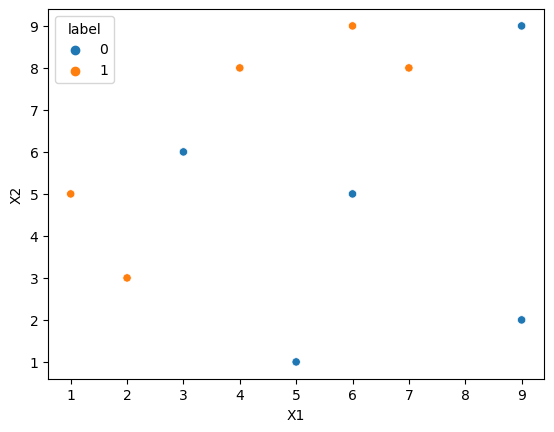

In [6]:
sns.scatterplot(x=df["X1"], y=df["X2"], hue=df["label"])

In [7]:
df["sample_weights"] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

DT1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:, 0:2]

In [11]:
y=df.iloc[:,2]

In [12]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [13]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [14]:
DT1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [15]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

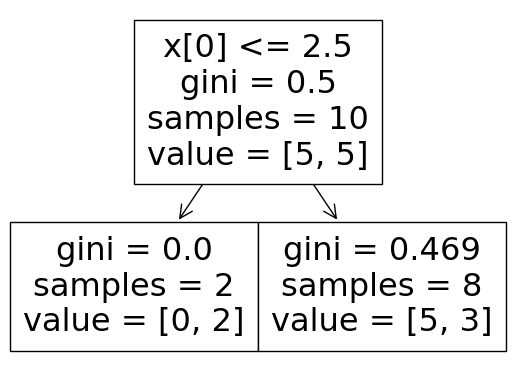

In [16]:
plot_tree(DT1)

In [17]:
X_arr = np.array(X)
y_arr = np.array(y)

C:\Users\BoSS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

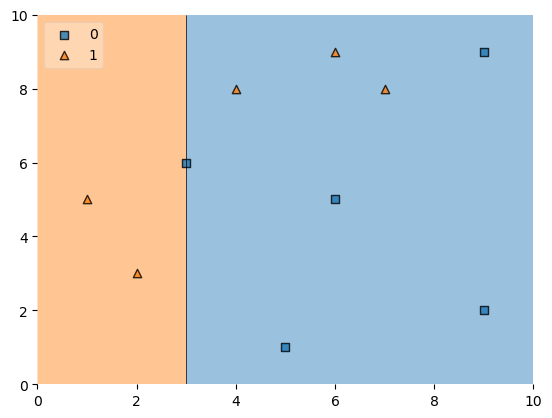

In [18]:
plot_decision_regions(X_arr,y_arr, clf=DT1, legend=2)

In [19]:
df["y_pred"] = DT1.predict(X)

In [20]:
df

,X1,X2,label,sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [21]:
# performance of the stump
def calculate_model_weight(error):
     return 0.5*np.log((1-error)/(error))

In [22]:
alpha1 = calculate_model_weight(0.3) # we havi 3 missclassified points
alpha1

0.42364893019360184

In [23]:
# calculate the updated weight

def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [24]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [25]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [26]:
df['sample_weights'].sum()

1.0

In [27]:
df['updated_weights'].sum()

0.9165153319682015

In [28]:
# normalize the updated_weights
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [29]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [30]:
df['normalized_weights'].sum()

1.0

In [31]:
# lets calculate the buckets : cummulative sum's

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

df.columns

Index(['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights',
       'normalized_weights', 'cumsum_upper', 'cumsum_lower'],
      dtype='object')

In [32]:
df[['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights',
       'normalized_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [33]:
# we want to do random sampling of my next df
# generating 10 random weights

indexes = []

for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)

In [34]:
indexes # this are rows we will pass to next decision tree

[1, 3, 5, 7, 0, 7, 7, 3, 4, 9]

In [35]:
# now will create a new datafarme with chosen indexed
second_df = df.iloc[indexes, :][["X1", "X2", "label", "sample_weights"]]

In [36]:
second_df

,X1,X2,label,sample_weights
1,2,3,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1


In [37]:
DT2 = DecisionTreeClassifier(max_depth=1)

In [38]:
X_arr = np.array(second_df.iloc[:, 0:2])
y_arr = np.array(second_df.iloc[:, 2])

In [39]:
DT2.fit(X_arr, y_arr)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

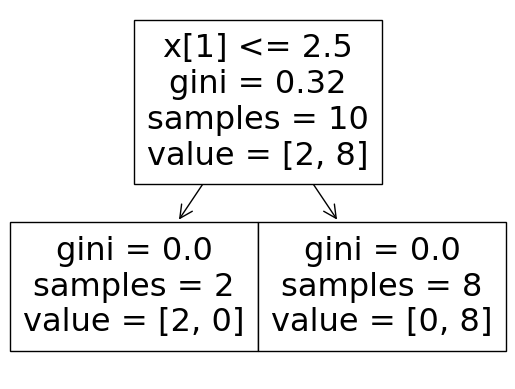

In [40]:
plot_tree(DT2)

<Axes: >

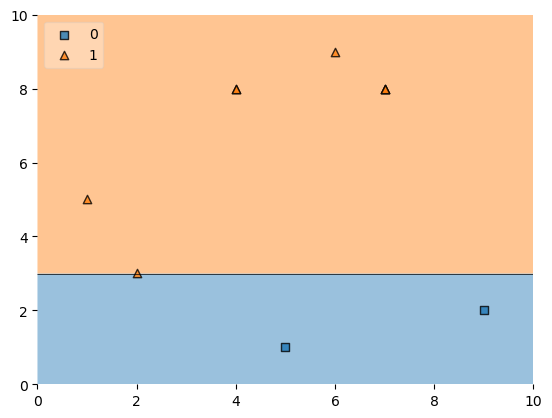

In [41]:
plot_decision_regions(X_arr,y_arr, clf=DT2, legend=2)

In [42]:
second_df["y_pred"] = DT2.predict(X_arr)

In [43]:
second_df

,X1,X2,label,sample_weights,y_pred
1,2,3,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,0


In [44]:
alpha2 = calculate_model_weight(0.2) # we havi 2 missclassified points
alpha2

0.6931471805599453

In [45]:
# calculate the updated weight

def update_row_weights(row, alpha=0.693):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [46]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [47]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.050007
3,4,8,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
0,1,5,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
3,4,8,1,0.1,1,0.050007
4,5,1,0,0.1,0,0.050007
9,9,2,0,0.1,0,0.050007


In [48]:
# normalize the updated_weights
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [49]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights
1,2,3,1,0.1,1,0.050007,0.1
3,4,8,1,0.1,1,0.050007,0.1
5,6,9,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
0,1,5,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
3,4,8,1,0.1,1,0.050007,0.1
4,5,1,0,0.1,0,0.050007,0.1
9,9,2,0,0.1,0,0.050007,0.1


In [50]:
# lets calculate the buckets : cummulative sum's

second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

second_df.columns

Index(['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights',
       'normalized_weights', 'cumsum_upper', 'cumsum_lower'],
      dtype='object')

In [51]:
second_df[['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights',
       'normalized_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.050007,0.1,0.0,0.1
3,4,8,1,0.1,1,0.050007,0.1,0.1,0.2
5,6,9,1,0.1,1,0.050007,0.1,0.2,0.3
7,7,8,1,0.1,1,0.050007,0.1,0.3,0.4
0,1,5,1,0.1,1,0.050007,0.1,0.4,0.5
7,7,8,1,0.1,1,0.050007,0.1,0.5,0.6
7,7,8,1,0.1,1,0.050007,0.1,0.6,0.7
3,4,8,1,0.1,1,0.050007,0.1,0.7,0.8
4,5,1,0,0.1,0,0.050007,0.1,0.8,0.9
9,9,2,0,0.1,0,0.050007,0.1,0.9,1.0


In [52]:
# we want to do random sampling of my next df
# generating 10 random weights

indexes = []

for i in range(second_df.shape[0]):
    a = np.random.random()
    for index, row in second_df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)

In [53]:
indexes

[3, 7, 7, 5, 0, 3, 5, 7, 3, 7]

In [54]:
# now will create a new datafarme with chosen indexed
third_df = second_df.iloc[indexes, :][["X1", "X2", "label", "sample_weights"]]

In [55]:
third_df

,X1,X2,label,sample_weights
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [56]:
DT3 = DecisionTreeClassifier(max_depth=1)

In [57]:
X_arr = np.array(third_df.iloc[:, 0:2])
y_arr = np.array(third_df.iloc[:, 2])

In [58]:
DT3.fit(X_arr, y_arr)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = 10.0')]

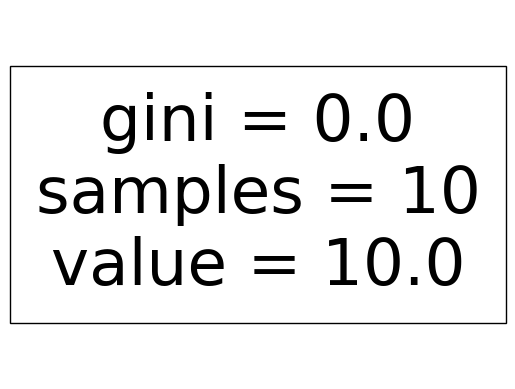

In [59]:
plot_tree(DT3)

<Axes: >

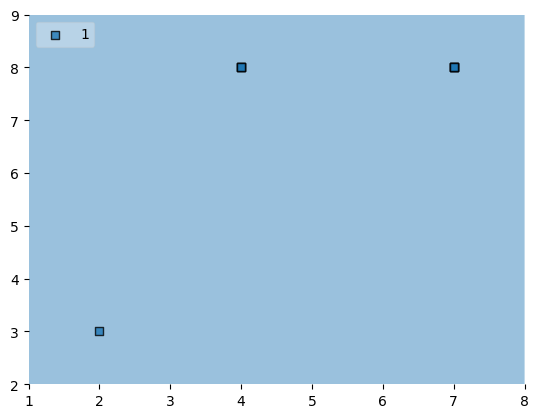

In [60]:
plot_decision_regions(X_arr,y_arr, clf=DT3, legend=2)

## Additive Modeling

### `Final_prediction = alpha1*DT1 + alpha2*DT2`

In [61]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [62]:
query=np.array([5, 1]).reshape(1,-1)

In [63]:
query

array([[5, 1]])

In [65]:
DT1.predict(query)

C:\Users\BoSS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [66]:
DT2.predict(query)

array([0], dtype=int64)

In [64]:
DT1.predict(query)*alpha1 + DT2.predict(query)*alpha2

C:\Users\BoSS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [68]:
f = alpha1*(-1) + alpha2*(-1)

In [70]:
final_pred =np.sign(f)

In [71]:
final_pred

-1.0

In [72]:
query2 = np.array([[6, 9]])

In [73]:
DT1.predict(query2)

C:\Users\BoSS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [74]:
DT2.predict(query2)

array([1], dtype=int64)

In [77]:
f2=alpha1*(1) + alpha2*(-1)

In [78]:
f2

-0.26949825036634345

In [79]:
np.sign(f2)

-1.0